In [ ]:
!pip install numpy pandas matplotlib seaborn plotly.express keras nltk

# Import librerie e definizione funzioni

In [ ]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import seaborn as sns
from datetime import datetime, timedelta
import time
from PIL import Image

import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer 
import gensim

plt.style.use('classic')
%matplotlib inline

sns.set()
drive.mount('/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def text_with_nltk(df_colonna_testo,nome_mese, pos=None):

  stop_words=set(stopwords.words("english"))
  stop_words.update(['co' , 'k', 'c', 'h', 'x', 'r', 'l','u','b', 'e', 'f', 'cs', 'mj'])
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~...'s|`` ’'''
  
  #unisco il testo di tutti i tweet
  all_tweet=""

  for tweet in df_colonna_testo:
    all_tweet+=' '+tweet.lower()

  all_tweet_no_emoji=remove_emoji(all_tweet) # cancellazione delle emoji e degli stickers

  tokenized_text = nltk.word_tokenize(all_tweet_no_emoji) # split delle singole parole

  filtered_sent=[] 
  for w in tokenized_text:
      if w not in stop_words and w not in punc:
          filtered_sent.append(w)


  lemmatizer = WordNetLemmatizer()
  #filtered_sent_lemm = ' '.join([lemmatizer.lemmatize(w, pos ="a") for w in filtered_sent])
  #filtered_sent=nltk.word_tokenize(filtered_sent_lemm)


 
  filtered_sent_corr=[] #essendo presenti stessi elementi con diversi nomi questi vengono rinominati 
  for w in filtered_sent:
      if w=='btc' or w=='bitcoin':
          filtered_sent_corr.append('BITCOIN')
      elif w=='eth' or w=='ethereum':
          filtered_sent_corr.append('ETHEREUM')
      elif w=='doge' or w=='dogecoin':
          filtered_sent_corr.append('DOGECOIN')    
      elif w=='bnb'or w=='binance':
          filtered_sent_corr.append('BINANCE')  
      elif w=='amp':
          filtered_sent_corr.append('AMP')  
      elif w=='xrp':
          filtered_sent_corr.append('XRP')
      elif w=='nft':
          filtered_sent_corr.append('APENFT')
      elif w=='ada':
          filtered_sent_corr.append('CARDANO')   
      elif w=='bsc':
          filtered_sent_corr.append('BOWSCOIN')
      elif w=='cryptocurrency' or w=='cryptocurrencies':
          filtered_sent_corr.append('crypto')
      else:
          filtered_sent_corr.append(w)
  print("Mostriamo le prime 10 parole con maggiore frequenza:")
  freq_dist = nltk.FreqDist(filtered_sent_corr)
  print(freq_dist.most_common(10))

  filtered_sent_crypto = [] 

  for elem in filtered_sent_corr: 
    if elem=='BITCOIN' or elem=='ETHEREUM' or elem=='DOGECOIN' or elem=='BINANCE' or elem=='AMP' or elem=='XRP' or elem=='APENFT' or elem=='CARDANO' or elem== 'BOWSCOIN' or elem== 'crypto':
      filtered_sent_crypto.append(elem)



  print("Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.")

  counted = Counter(filtered_sent_crypto)
  word_freq = pd.DataFrame(counted.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)  
  plot=sns.barplot(x='Frequency', y='Word', data=word_freq)
  plt.setp(plot.get_xticklabels(), rotation=45)

  print("\n\n\n")
  
  filtered_sent_no_crypto=[] # elimazione delle diverse valute

  for w in filtered_sent_corr:
      if not w=='BITCOIN' and not w=='ETHEREUM' and not w=='DOGECOIN' and not w=='BINANCE' and not w=='AMP' and not w=='XRP' and not w=='APENFT' and not w=='CARDANO' and not w== 'BOWSCOIN' and not w=='crypto':
          filtered_sent_no_crypto.append(w)

  print("Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:")
  freq_dist = nltk.FreqDist(filtered_sent_no_crypto)
  print(freq_dist.most_common(10))

  print("Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:")

  counted = Counter(filtered_sent_no_crypto)
  counted_2= Counter(ngrams(filtered_sent_no_crypto,2))
  counted_3= Counter(ngrams(filtered_sent_no_crypto,3))
  word_freq = pd.DataFrame(counted.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['Bigram','Frequency']).sort_values(by='Frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['Trigrams','Frequency']).sort_values(by='Frequency',ascending=False)
  fig, axes = plt.subplots(3,1,figsize=(8,20))
  sns.barplot(ax=axes[0],x='Frequency',y='Word',data=word_freq.head(30))
  sns.barplot(ax=axes[1],x='Frequency',y='Bigram',data=word_pairs.head(30))
  sns.barplot(ax=axes[2],x='Frequency',y='Trigrams',data=trigrams.head(30))



  filtered_sent_no_cryptoSTR = ' '.join(map(str, filtered_sent_no_crypto))

  def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

  if pos=='y':
    bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/p.png"))
  elif pos=='n':
    bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/n.png"))
  else:
    bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/B.png"))


  transformed_bitcoin_mask = np.ndarray((bitcoin_mask.shape[0],bitcoin_mask.shape[1]), np.int32)

  for i in range(len(bitcoin_mask)):
      transformed_bitcoin_mask[i] = list(map(transform_format, bitcoin_mask[i]))
      
  wc = WordCloud(background_color="white", max_words=500, mask=transformed_bitcoin_mask
              )#contour_width=0.001, contour_color='gray'
  wc.generate(filtered_sent_no_cryptoSTR)

  print("\n\n\n")

  plt.figure(figsize=[20,10])
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('WordCloud of {}'.format(nome_mese))
  plt.show()


# Import dataset

In [ ]:
df_tweets = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_2021.csv")
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets.set_index(['date']).sort_index()

df_tweets['user_created'] = pd.to_datetime(df_tweets['user_created'])
df_tweets

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,debunking bitcoin myths by patrick lowry crypt...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App
2021-02-05 10:52:04,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,weekend read keen to learn about crypto assets...,['crypto'],Twitter Web App
2021-02-05 10:52:06,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,bloomberg lp cryptooutlook with mikemcglone cr...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App
2021-02-05 10:52:07,Iconic Holding,2021-01-05 13:22:24,301.0,1075,361,False,blockchain by delrayman forbes forbescrypto cr...,"['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App
2021-02-05 10:52:26,Nick Doevendans,2020-06-12 16:50:07,37.0,123,410,False,reddcoin rdd reddcoin to the moon altcoin turn...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,2020-10-25 12:23:58,265.0,415,15391,False,hodlingcarla wooohoooo k in sight bitcoin t co...,['bitcoin'],Twitter for iPhone
2021-07-30 23:59:56,The Last Sat,2020-09-14 04:00:03,3.0,18,11,False,before you know it we ll be under sats left t ...,"['Bitcoin', 'stayhumblestacksats']",Twitter for Android
2021-07-30 23:59:57,Air アーロン,2021-02-15 21:42:55,64.0,451,920,False,btc just hit jackie robinson,['btc'],Twitter for Android


Andiamo ad analizzare e i testi dei tweet divisi per mesi per poterli confrontare e vedere a seconda del mese quali sono le parole più usate. Prendiamo solo i mesi completi, quindi saltiamo il primo mese.

# Dataset intero

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 948369), ('crypto', 316221), ('ETHEREUM', 151633), ('BINANCE', 131230), ('project', 99105), ('DOGECOIN', 82486), ('airdrop', 61532), ('price', 58111), ('blockchain', 53483), ('BOWSCOIN', 52848)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('project', 99105), ('airdrop', 61532), ('price', 58111), ('blockchain', 53483), ('good', 39658), ('buy', 38555), ('get', 35499), ('defi', 33998), ('elonmusk', 31754), ('join', 29499)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






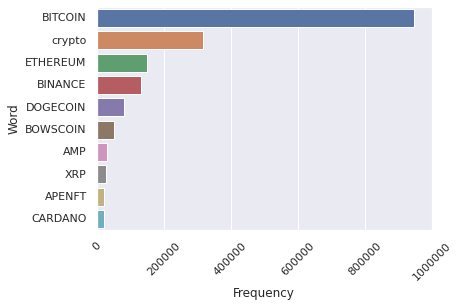

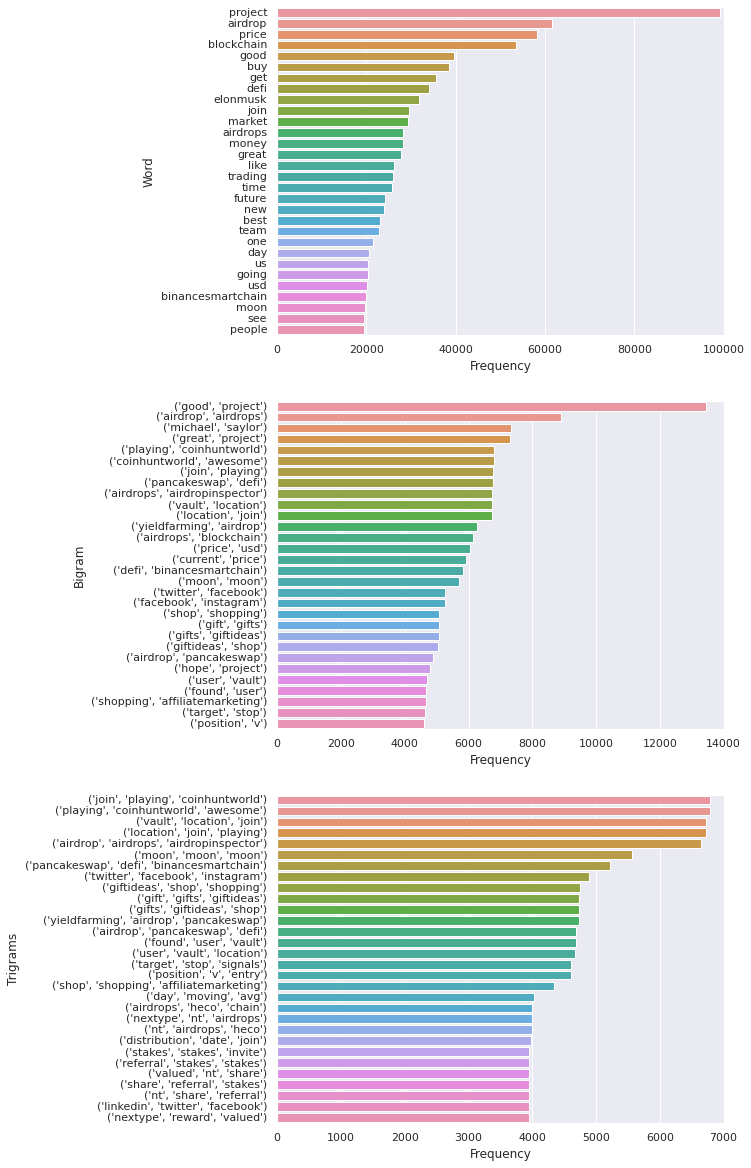

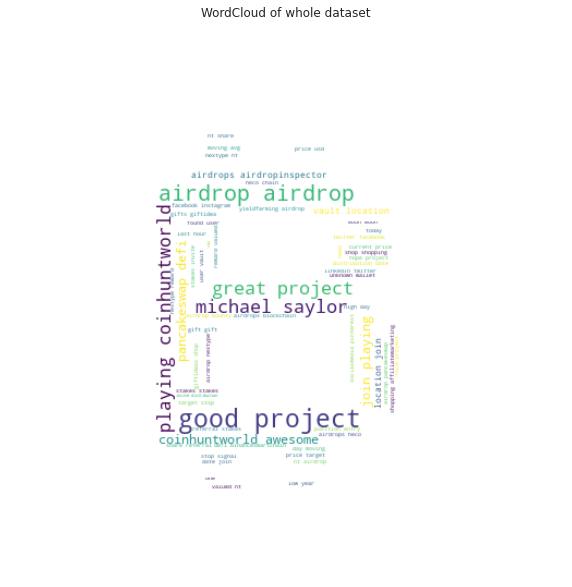

In [ ]:
text_with_nltk(df_tweets['text'], 'whole dataset')

# Marzo

In [ ]:
df_marzo=df_tweets['2021-03-01':'2021-03-31']
df_marzo

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-03-11 22:29:39,Neozul,2009-05-18 17:40:53,226.0,461,1299,False,bitcoin retesting ath bitcoin btc crypto,"['Bitcoin', 'btc', 'Crypto']",Twitter for iPhone
2021-03-11 22:30:02,PiRoyot,2020-06-07 10:46:59,5.0,0,0,False,market id btc aud last price hour high hour lo...,"['btc', 'bitcoin']",HashTagTrendRoy
2021-03-11 22:30:23,Jonbull,2010-03-15 03:38:08,2787.0,4275,6300,False,bill gates advised against investing in bitcoi...,"['Bitcoin', 'BTC']",Twitter for iPhone
2021-03-11 22:31:26,CPonCT,2012-04-10 21:28:50,85.0,277,3188,False,btc pop or drop volatility in btc bitcoin brea...,"['volatility', 'BTC', 'Bitcoin', 'breakout', '...",Twitter for Android
2021-03-11 22:31:27,Sokyu Honma,2020-12-12 23:55:52,511.0,572,361,False,btc bitcoin forex nzd usd forecast to t co hwf...,"['BTC', 'Bitcoin', 'FOREX']",Zapier.com
...,...,...,...,...,...,...,...,...,...
2021-03-12 23:51:39,"The Crankiest Canadian. Can't stop, won't stop.",2016-09-30 17:16:41,146.0,191,7123,False,on a road trip updatin blockchains in an awcan...,['blockchains'],Twitter Web App
2021-03-12 23:52:36,Vandelay ₿TC Industries,2010-08-08 03:54:35,907.0,923,2806,False,xentagz sigh errata you bitches but even in th...,NaN,Twitter Web App
2021-03-12 23:55:11,The Wolf of Trading,2020-06-05 03:32:47,747.0,5001,3008,False,akropolis akro chromia chr urgent analysis amp...,"['Akropolis', 'AKRO', 'Chromia', 'CHR']",Twitter Web App


Notiamo subito che questo mese ha pochissime righe, quindi la sua analisi è poco significativa.

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 5063), ('crypto', 1192), ('ETHEREUM', 477), ('price', 362), ('BINANCE', 304), ('hour', 199), ('forex', 197), ('market', 186), ('get', 178), ('trading', 152)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('price', 362), ('hour', 199), ('forex', 197), ('market', 186), ('get', 178), ('trading', 152), ('usd', 151), ('new', 151), ('finance', 148), ('high', 142)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






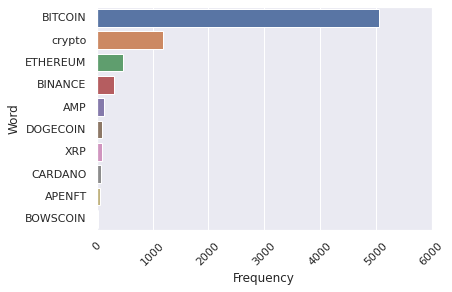

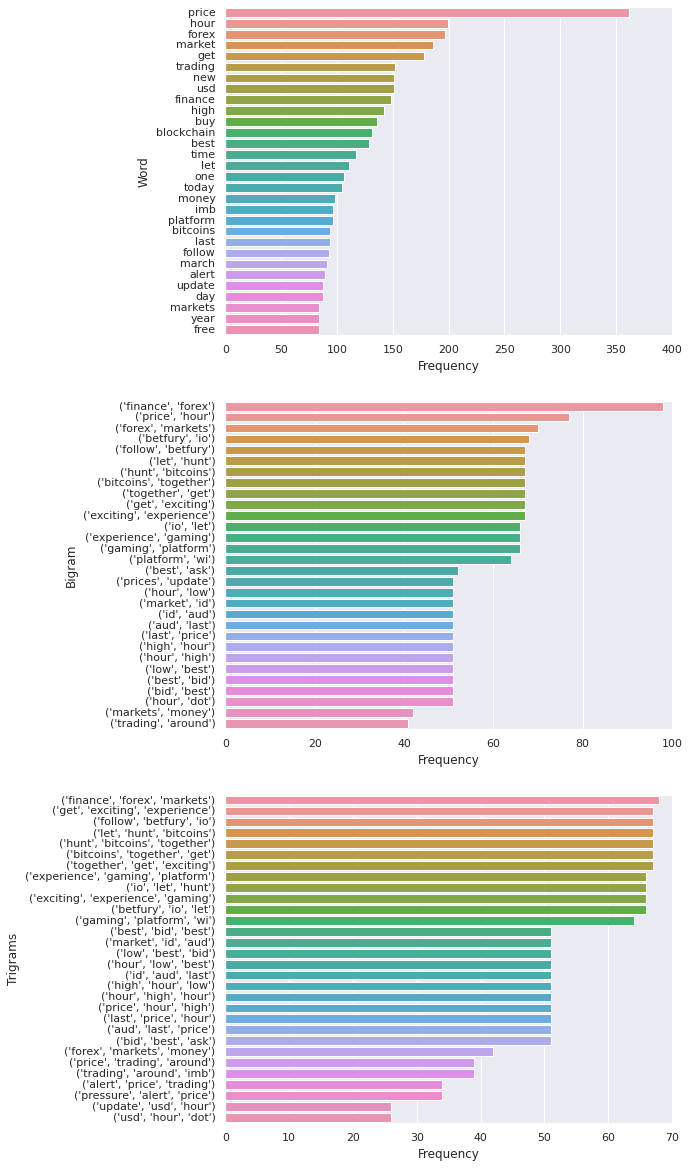

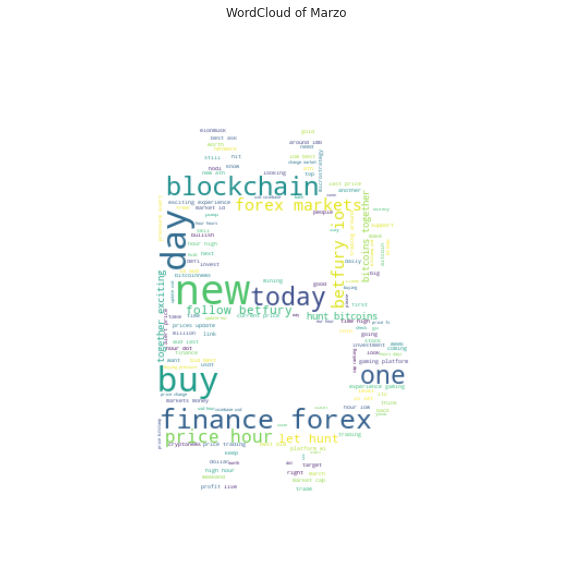

In [ ]:
text_with_nltk(df_marzo['text'], 'Marzo')

# Aprile

In [ ]:
df_aprile=df_tweets['2021-04-01':'2021-04-30']
df_aprile

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-04-05 11:43:09,Crypto Wizard 🧙‍♂️,2021-03-31 18:09:29,57.0,67,734,False,in early feb just after their q earnings date ...,NaN,Twitter for iPhone
2021-04-05 11:46:58,CaptainScio 3 mo. 30 days til Full Time Trading,2013-12-11 23:19:53,2608.0,289,1707,False,good morning primary trend is up today is a se...,"['BTC', 'BITCOIN']",Twitter Web App
2021-04-05 11:47:16,Northstar,2019-02-17 19:09:27,38998.0,423,16925,False,orchid oxt attempting to push through resistan...,"['Orchid', 'OXT', 'cryptocurrencies']",Twitter Web App
2021-04-05 11:48:15,Coin Yeti,2020-03-10 23:05:38,53.0,95,56,False,free ton community s meritocratic token distri...,"['bitcoin', 'btc', 'eth']",Revive Social App
2021-04-05 11:48:40,Shakeel Akhtar Yousufzai,2021-01-03 13:42:04,427.0,728,359,False,cardano price prediction latest forexshakeel c...,"['ForexShakeel', 'coin', 'dogecoin', 'doge', '...",Twitter Web App
...,...,...,...,...,...,...,...,...,...
2021-04-24 23:55:40,Rendi_Rahtomo,2011-02-27 13:34:55,43.0,283,244,False,saferockettoken wish me good luck gitawidya ab...,"['giveaway', 'bitcoin', 'Berikan', 'cryptocurr...",Twitter Web App
2021-04-24 23:56:05,PGRA,2011-11-16 16:37:05,66.0,198,4884,False,bitcoin is fucked any questions btc,"['bitcoin', 'btc']",Twitter for iPhone
2021-04-24 23:56:07,Tendongeo Ricardo Y.,2019-03-17 09:08:55,50.0,412,5,False,hi you are one step into mining a free cryptoc...,"['bitcoin', 'btc', 'USTD', 'blockchain']",Twitter for Android


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 99203), ('crypto', 29717), ('ETHEREUM', 15451), ('price', 8676), ('BINANCE', 8264), ('DOGECOIN', 7681), ('XRP', 5601), ('blockchain', 5581), ('day', 3873), ('usd', 3791)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('price', 8676), ('blockchain', 5581), ('day', 3873), ('usd', 3791), ('money', 3252), ('market', 3238), ('buy', 3227), ('trading', 3140), ('get', 2933), ('forex', 2885)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






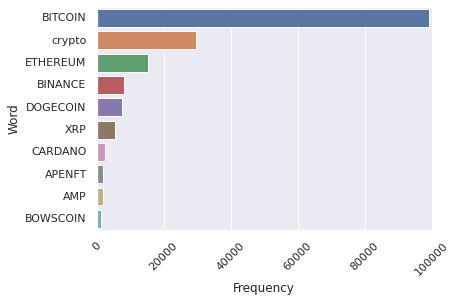

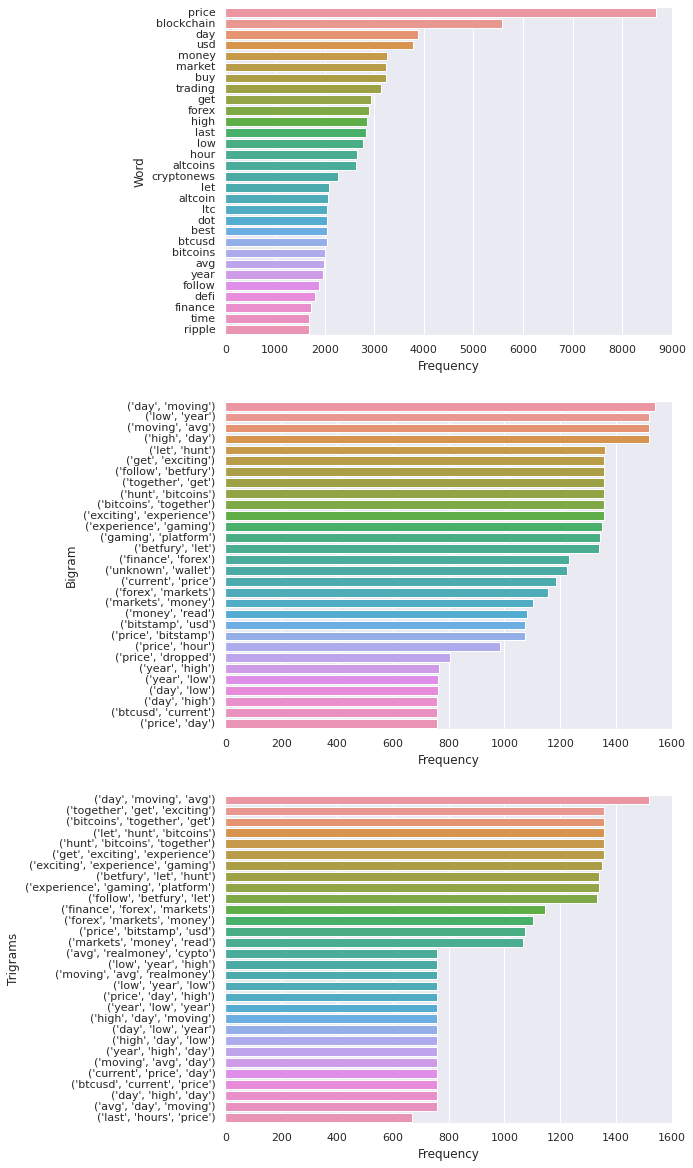

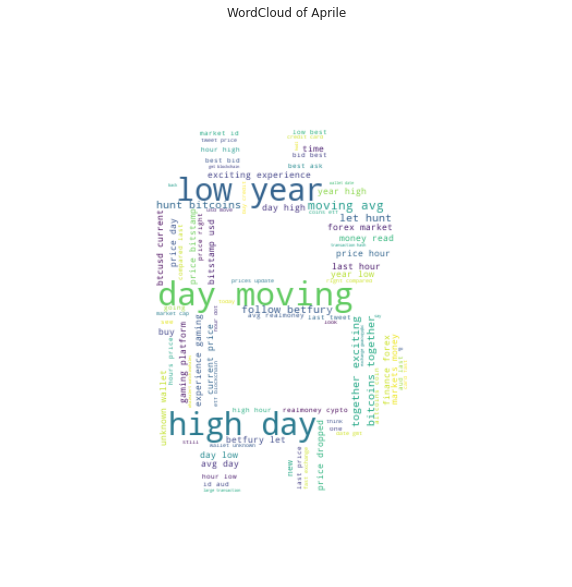

In [ ]:
text_with_nltk(df_aprile['text'], 'Aprile')

# Maggio

In [ ]:
df_maggio=df_tweets['2021-05-01':'2021-05-31']
df_maggio

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-05-25 10:38:33,CryptoSquawk,2017-10-05 10:13:09,2481.0,28,100,False,increased liquidity btc traded so far at t co ...,"['Bitcoin', 'crypto', 'BTC']",CryptoSquawkBot
2021-05-25 10:39:41,₿ 𝗰𝗼𝗶𝗻𝗺𝗮𝘀𝘁𝗲𝗿 ₿,2012-12-04 14:26:05,5382.0,216,3477,False,sniped the bottom sniped the top k was rejecte...,"['BTC', 'Bitcoin']",Twitter Web App
2021-05-25 10:39:52,Crypto King_Astrologer💥India🇮🇳,2020-03-05 00:36:06,19.0,283,15,False,huge drop is on the way prepare yourself for t...,"['BTC', 'Bitcoin', 'cryptocurrency', 'cryptotw...",Twitter for Android
2021-05-25 10:40:22,A7M3D,2016-10-11 00:20:34,56.0,235,740,False,i told you buttcoin ponzi will dump not fud dn...,"['FUD', 'HODL', 'bitcoin', 'binance', 'Altseas...",Twitter for iPhone
2021-05-25 10:41:15,Bitcoin Mate (BTC News App),2015-03-08 06:31:18,4150.0,1971,199,False,b it firm globant revealed as bitcoin s latest...,"['btc', 'bitcoinnews', 'bitcoin']",Twibble.io
...,...,...,...,...,...,...,...,...,...
2021-05-29 23:54:59,Kush Jain (Mudrex),2011-07-02 21:43:09,493.0,680,3535,False,everyone can be a genius looking back at histo...,"['InvestSmart', 'BTC', 'Bitcoin']",ContentStudio.io
2021-05-29 23:56:48,TK.,2020-04-08 17:27:55,121.0,47,3537,False,d j vu all those investors in crypto hoping an...,"['crypto', 'Bitcoin', 'Ethereum', 'BTC']",Twitter for iPhone
2021-05-29 23:57:04,YouTube: The Hodlers,2021-05-21 03:36:32,10.0,76,3,False,matt odell coinbase ceo brian armstrong on the...,"['TheHod', 'Bitcoin', 'Btc', 'Coinbase', 'cryp...",Twitter Web App


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 49504), ('crypto', 16511), ('ETHEREUM', 8345), ('BINANCE', 5219), ('price', 3124), ('DOGECOIN', 3041), ('blockchain', 2764), ('day', 2592), ('XRP', 2080), ('CARDANO', 1902)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('price', 3124), ('blockchain', 2764), ('day', 2592), ('cryptonews', 1635), ('wallet', 1625), ('usd', 1610), ('unknown', 1502), ('low', 1448), ('avg', 1423), ('high', 1389)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






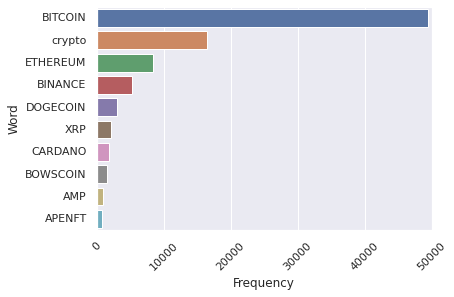

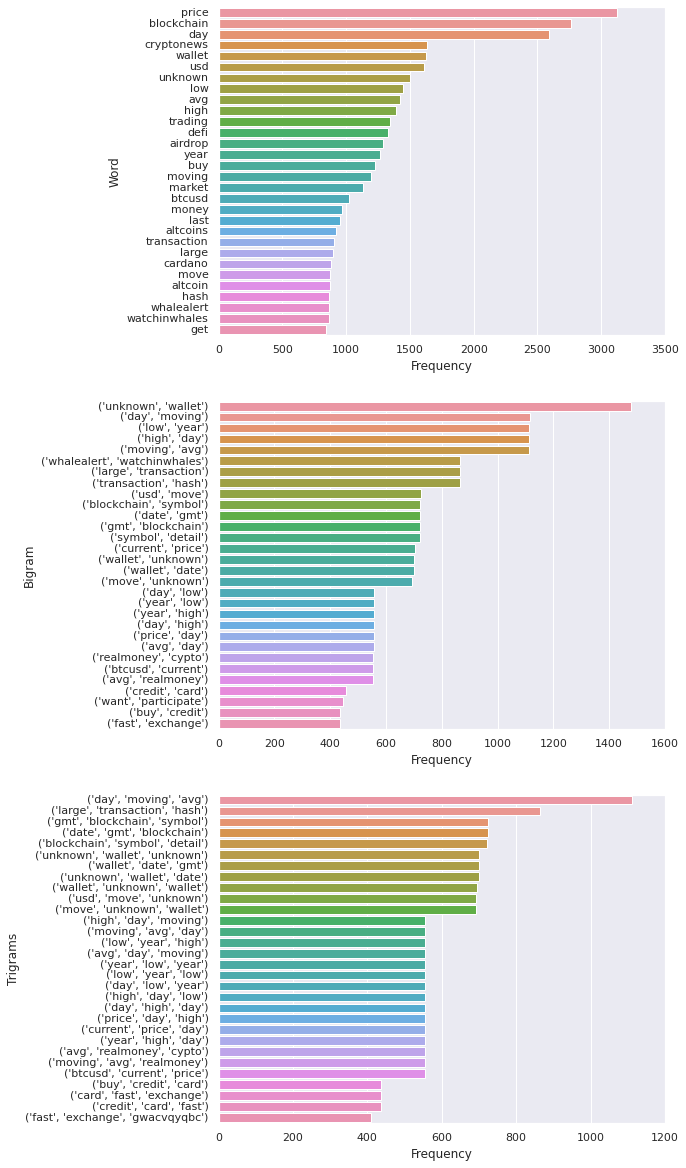

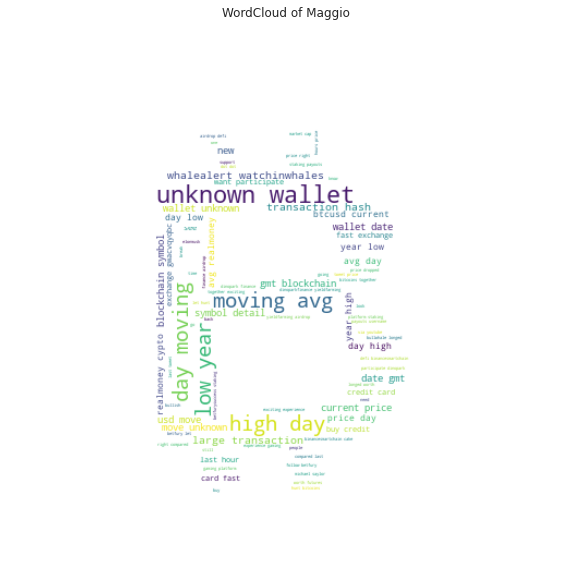

In [ ]:
text_with_nltk(df_maggio['text'], 'Maggio')

# Giugno

In [ ]:
df_giugno=df_tweets['2021-06-01':'2021-06-30']
df_giugno

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-06-20 16:31:37,Coralcoin,2020-12-02 12:03:08,12.0,142,292,False,cmaxwellerdoc maxkeiser love your bitcoin disp...,['Bitcoin'],Twitter for iPhone
2021-06-20 16:31:37,Nurjanah,2021-05-06 06:31:18,8.0,254,189,False,ortcoin good project sir yusfina tri nurjana o...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter Web App
2021-06-20 16:31:37,Yousuf Mahtab ⚡💫,2009-08-18 15:38:33,2154.0,4966,32421,False,yahoooo i just downloaded walletofsatoshi app ...,"['Bitcoin', 'satoshis']",Twitter Web App
2021-06-20 16:31:41,Crypto Hunter ₿,2021-01-10 14:02:07,22.0,144,171,False,coingecko bought more satoshi bitcoin amp eth,['Bitcoin'],Twitter for Android
2021-06-20 16:31:42,Satoshis_Dragon ⚡💧🔴 🌋🇸🇻🗺️,2011-04-17 23:40:52,619.0,481,7197,False,bchydro bitcoin mining t co ymvfw bq q,['bitcoin'],Twitter for Android
...,...,...,...,...,...,...,...,...,...
2021-06-23 19:29:21,Ingegner_gekko,2020-10-20 15:00:26,186.0,480,6554,False,a true degenerate we will miss you rip bitcoin...,['Bitcoin'],Twitter for Android
2021-06-23 19:29:31,Nima Abed,2018-04-24 19:03:29,12.0,44,566,False,traderrocko apompliano exactly bitcoin welcome,['Bitcoin'],Twitter for Android
2021-06-23 19:29:33,Mazharul Islam,2012-11-03 11:18:04,503.0,1027,3649,False,official eshop airdrop if you missed meme toke...,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 162525), ('crypto', 54221), ('BINANCE', 22810), ('ETHEREUM', 21793), ('airdrop', 15035), ('project', 14614), ('DOGECOIN', 14587), ('BOWSCOIN', 12094), ('price', 9741), ('buy', 7706)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('airdrop', 15035), ('project', 14614), ('price', 9741), ('buy', 7706), ('defi', 7688), ('good', 7521), ('join', 7087), ('china', 6645), ('blockchain', 6638), ('binancesmartchain', 6019)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






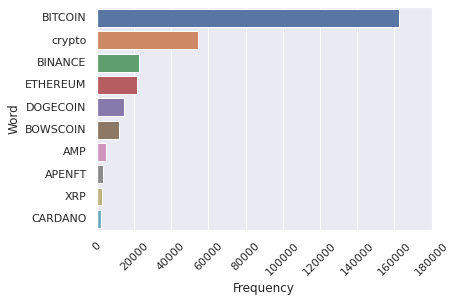

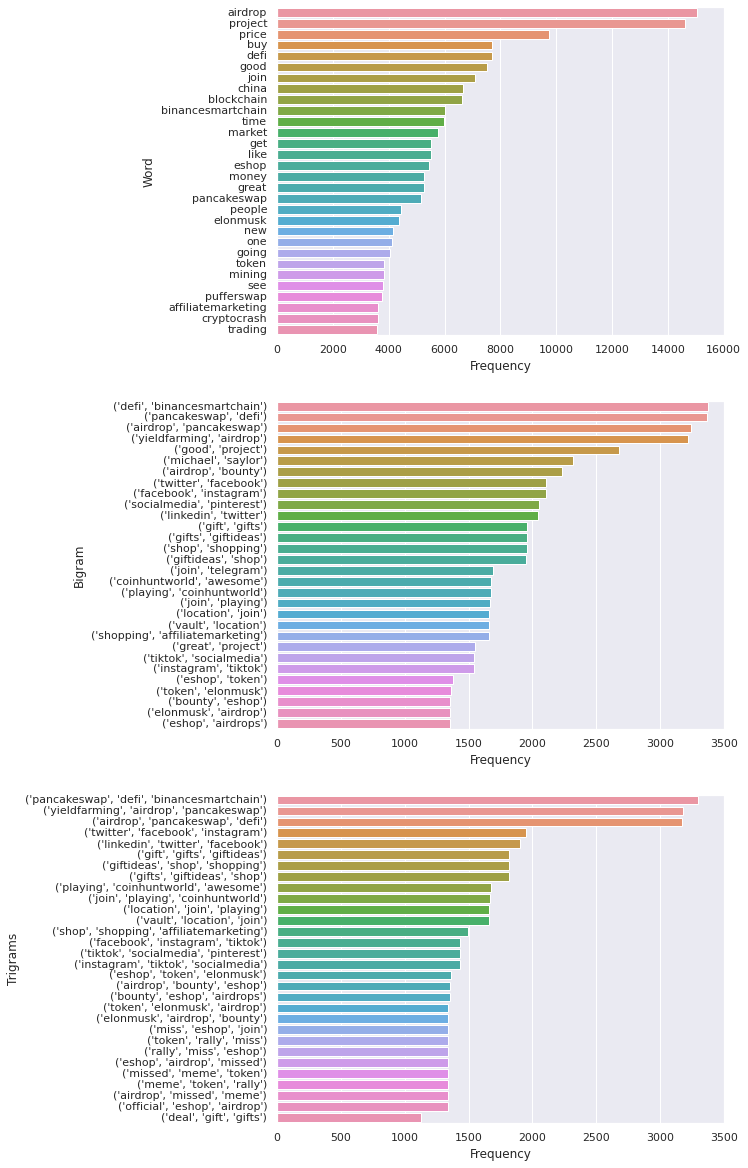

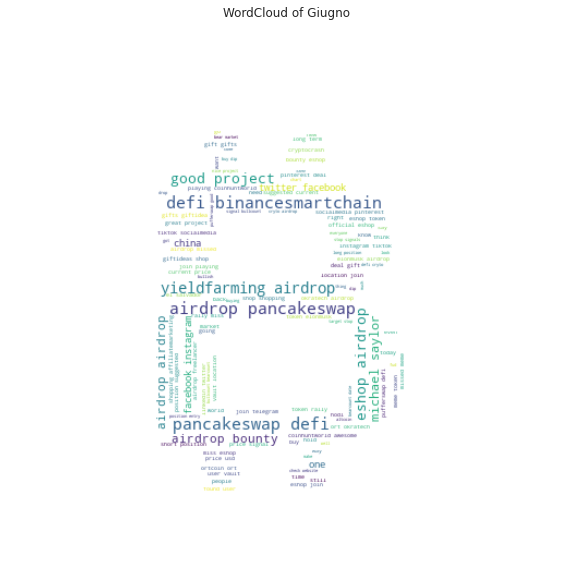

In [ ]:
text_with_nltk(df_giugno['text'], 'Giugno')

#Luglio

In [ ]:
df_luglio=df_tweets['2021-07-01':'2021-07-30']
df_luglio

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source
date,,,,,,,,,
2021-07-02 09:06:20,MardΞni 🌋,2020-01-16 07:40:52,145.0,93,1525,False,elonmusk the clean energy that bitcoin uses no...,['Bitcoin'],Twitter for Android
2021-07-02 09:06:20,icon0.com,2010-04-11 06:22:55,599.0,15,3324,False,download bitcoin icon sign design free images ...,"['bitcoin', 'btc', 'cryptocurrency', 'crypto',...",Twitter Web App
2021-07-02 09:06:21,Der Zeitgeist,2013-02-11 15:28:36,1929.0,1803,5252,False,what do we learn from this don t mess with the...,"['ElSalvador', 'BTC', 'Bitcoin', 'mining', 'IM...",Twitter Web App
2021-07-02 09:06:21,Juliana,2021-06-28 05:27:54,11.0,212,1058,False,giveawayhost bismillah wish me luck bitcoin,['Bitcoin'],Twitter for Android
2021-07-02 09:06:24,🐥🍀,2018-01-14 07:33:25,17.0,1324,1870,False,earnbnb bsc btc bnb bitcoin bsc earnbnb bnb fa...,"['BNB', 'Bitcoin', 'BSC', 'earnBNB', 'fairlaun...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:59:56,Nitin Dass ∞/21M,2020-10-25 12:23:58,265.0,415,15391,False,hodlingcarla wooohoooo k in sight bitcoin t co...,['bitcoin'],Twitter for iPhone
2021-07-30 23:59:56,The Last Sat,2020-09-14 04:00:03,3.0,18,11,False,before you know it we ll be under sats left t ...,"['Bitcoin', 'stayhumblestacksats']",Twitter for Android
2021-07-30 23:59:57,Air アーロン,2021-02-15 21:42:55,64.0,451,920,False,btc just hit jackie robinson,['btc'],Twitter for Android


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 576816), ('crypto', 202521), ('ETHEREUM', 99308), ('BINANCE', 89889), ('project', 82262), ('DOGECOIN', 53161), ('airdrop', 44206), ('BOWSCOIN', 37774), ('blockchain', 37309), ('price', 32890)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('project', 82262), ('airdrop', 44206), ('blockchain', 37309), ('price', 32890), ('good', 29613), ('airdrops', 24594), ('buy', 24082), ('elonmusk', 23428), ('get', 23361), ('defi', 22466)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






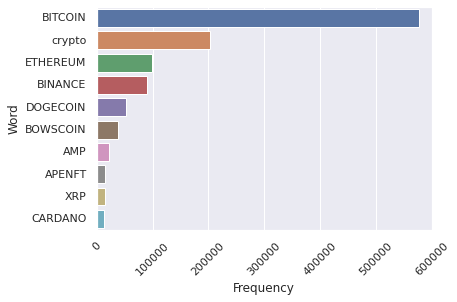

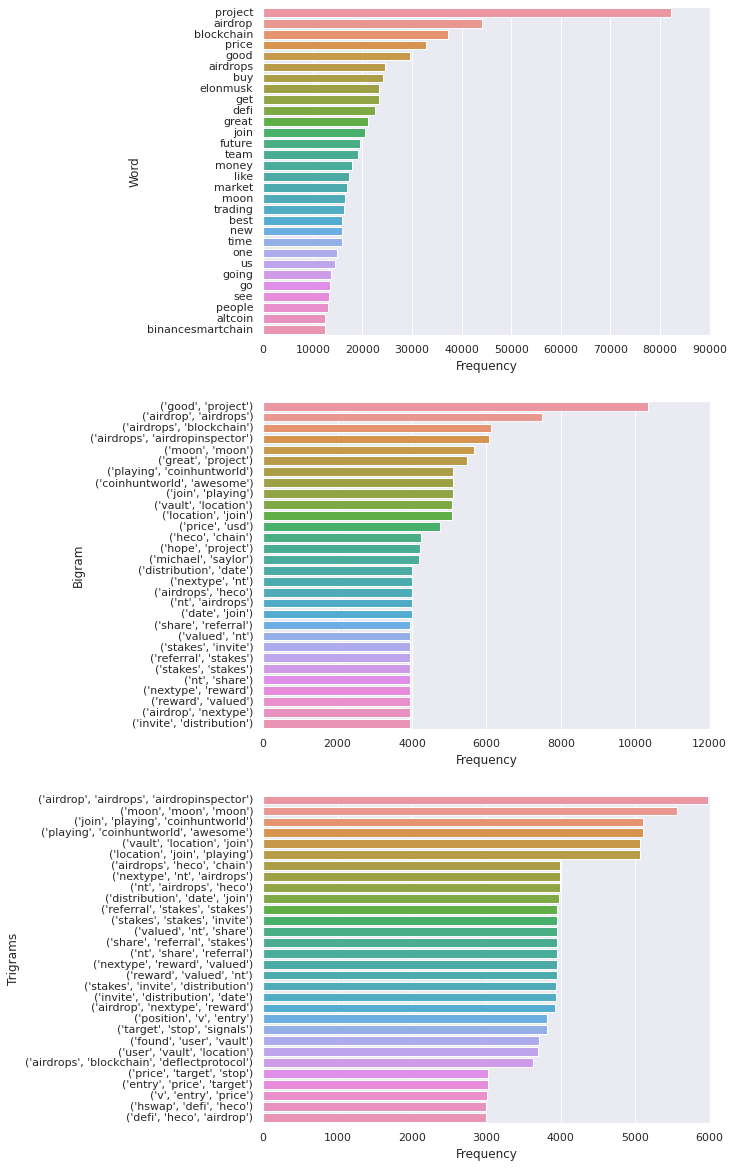

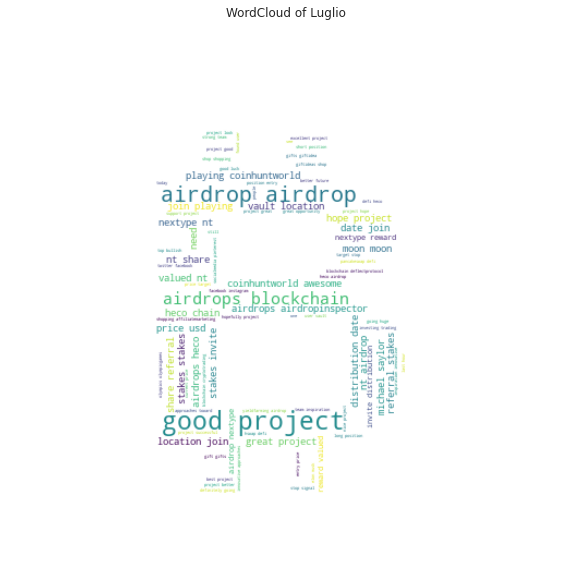

In [ ]:
text_with_nltk(df_luglio['text'], 'Luglio')

# Analisi testo per sentiment

In [ ]:
df_sentiment = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_sentiment_2021.csv")
df_sentiment

,date,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,vader_polarity,vader_sentiment,transformers_sentiment
0,2021-02-05 11:14:18,EmilyNews,2017-01-16 10:58:53,439.0,1,6,False,warning powerearn outside project fast scam si...,"['EmilyNews', 'invest', 'HYIPs', 'bitcoin', 'c...",IFTTT,-0.7269,0,0
1,2021-02-05 11:20:58,Trading MarcoDaCosta,2010-03-01 19:35:17,5367.0,927,34484,False,twitter ceo jack dorsey has fired up a full bi...,"['Twitter', 'Dorsey', 'Bitcoin', 'BTC']",Twitter for iPhone,-0.5574,0,1
2,2021-02-05 11:25:28,Kris Ninakos,2018-09-01 12:06:16,741.0,1315,3996,False,a possible big move for btc bitcoin is coming ...,"['BTC', 'BITCOIN']",Twitter for Android,-0.2023,0,1
3,2021-02-05 11:39:20,Emanuel Siddhartha,2021-02-02 14:01:33,15.0,55,59,False,no vcs no ico no unlimited supply no pump and ...,"['znn', 'aliens', 'BTC', 'Bitcoin']",Twitter Web App,-0.8910,0,1
4,2021-02-05 11:44:02,Bitcoin Mate (BTC News App),2015-03-08 06:31:18,3312.0,1976,201,False,bitcoin s wild ride renews worries about its m...,NaN,Twibble.io,-0.4215,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171055,2021-07-30 23:59:16,Alt Center Signals,2020-10-27 15:34:54,197.0,2,8,False,binance futures srm usdt all take profit targe...,"['SRM', 'Signals', 'CryptoSignals', 'Crypto', ...",IFTTT,0.8271,1,1
171056,2021-07-30 23:59:36,George Brien,2018-07-27 18:41:18,12443.0,140,13523,False,bitcoin at k will hit k soon hodl yours don t ...,['Bitcoin'],Twitter for iPhone,-0.5106,0,0
171057,2021-07-30 23:59:38,HODL21,2011-09-23 14:41:38,477.0,914,8322,False,i m actually one of the few people i know who ...,['bitcoin'],Twitter for iPhone,-0.2960,0,1
171058,2021-07-30 23:59:50,David Barge,2009-09-11 20:20:46,53.0,138,2584,False,bitcoin cruising by k no problem,['Bitcoin'],Twitter for Android,-0.5994,0,1


## Positivo

In [ ]:
df_pos=df_sentiment[df_sentiment['transformers_sentiment']==1]
#df_pos

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 170380), ('project', 70625), ('crypto', 66453), ('BINANCE', 36869), ('airdrop', 32666), ('ETHEREUM', 28263), ('BOWSCOIN', 20743), ('great', 20671), ('good', 19525), ('airdrops', 18055)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('project', 70625), ('airdrop', 32666), ('great', 20671), ('good', 19525), ('airdrops', 18055), ('team', 17514), ('best', 16859), ('blockchain', 14886), ('future', 14481), ('price', 13351)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






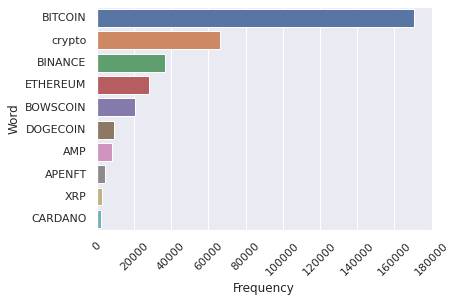

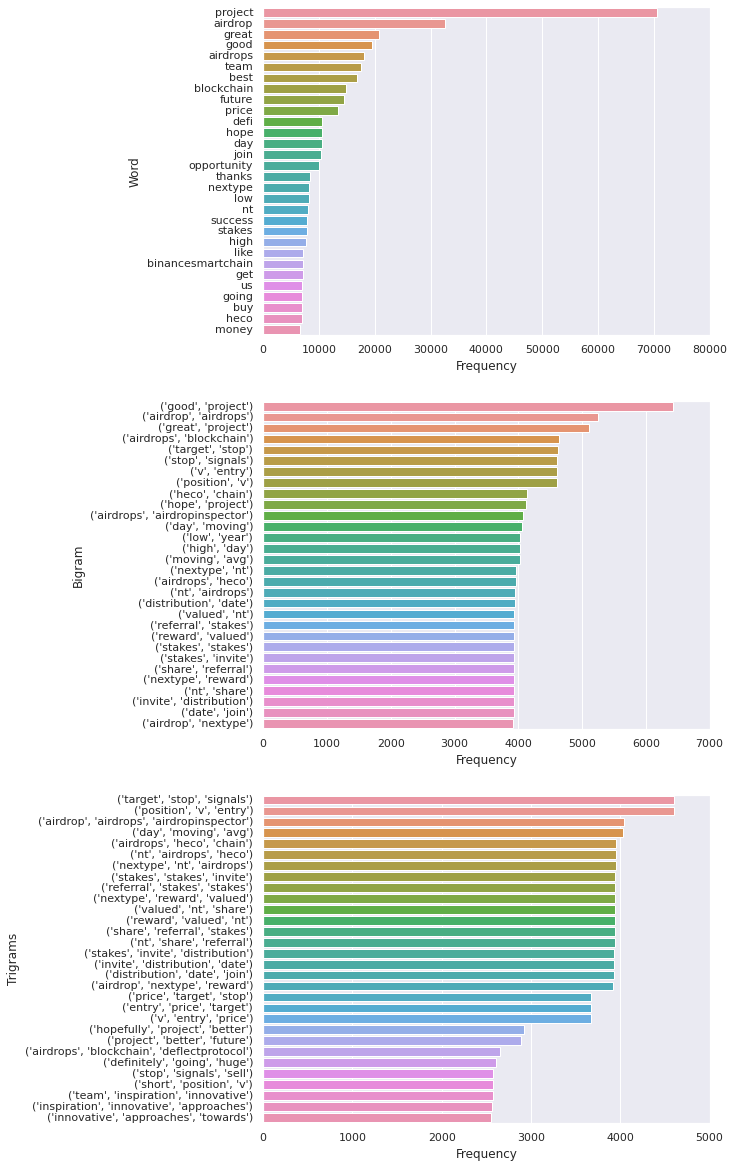

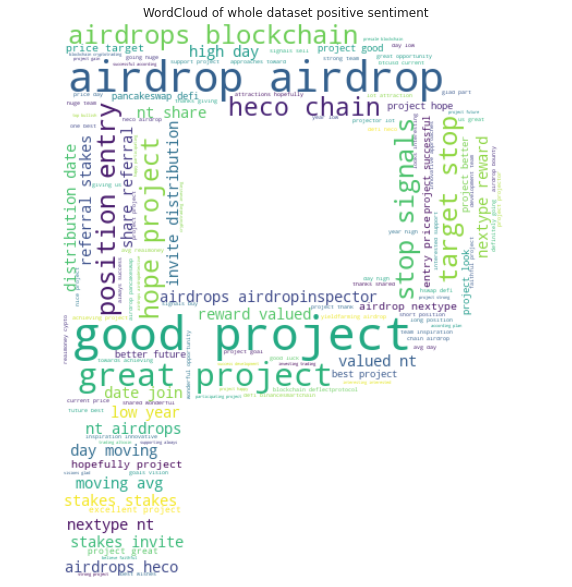

In [ ]:
text_with_nltk(df_pos['text'], 'whole dataset positive sentiment', pos='y')

## Negativo

In [ ]:
df_neg=df_sentiment[df_sentiment['transformers_sentiment']==0]
#df_neg

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 66226), ('crypto', 16918), ('ETHEREUM', 6683), ('DOGECOIN', 3722), ('BINANCE', 3685), ('market', 3661), ('people', 3381), ('price', 2840), ('AMP', 2598), ('buy', 2549)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('market', 3661), ('people', 3381), ('price', 2840), ('buy', 2549), ('money', 2475), ('china', 2378), ('time', 2313), ('get', 2287), ('covid', 2226), ('covidvaccine', 2073)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






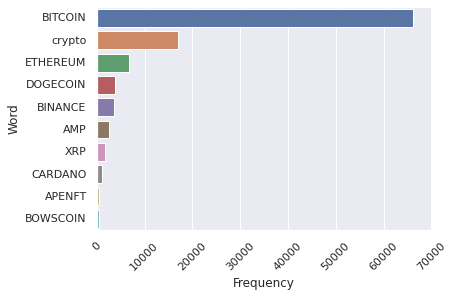

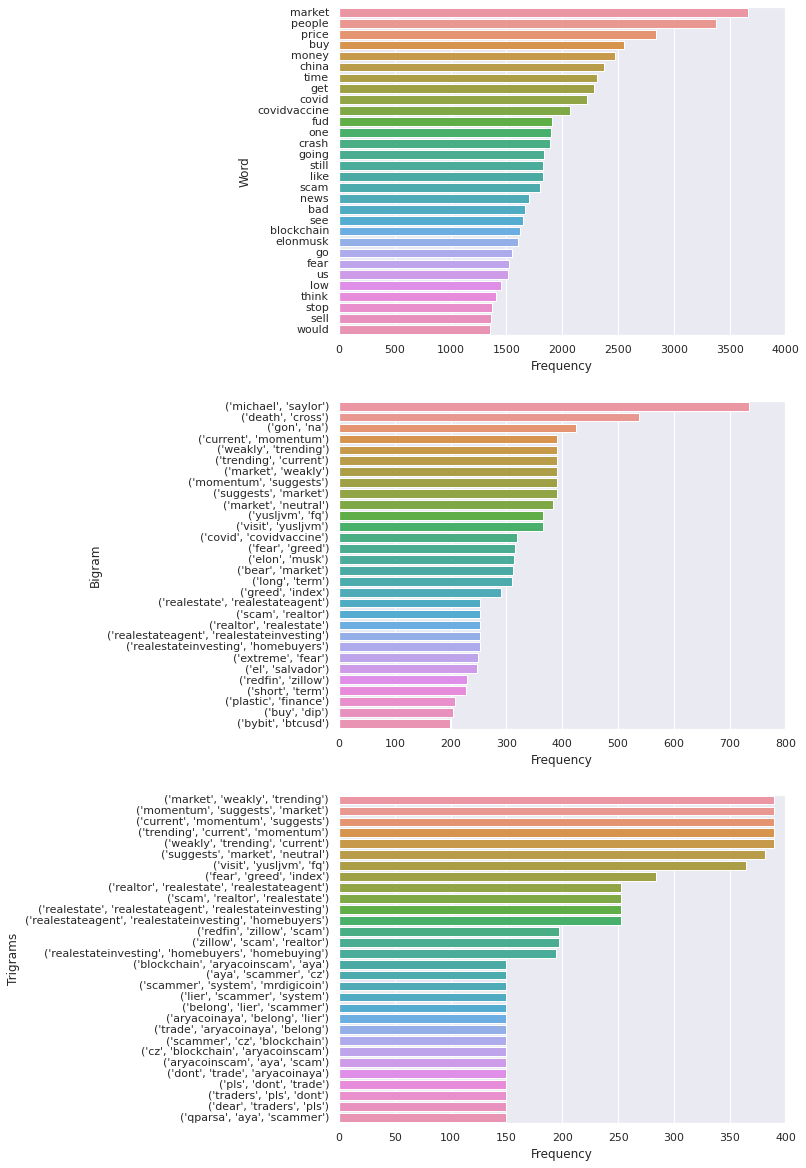

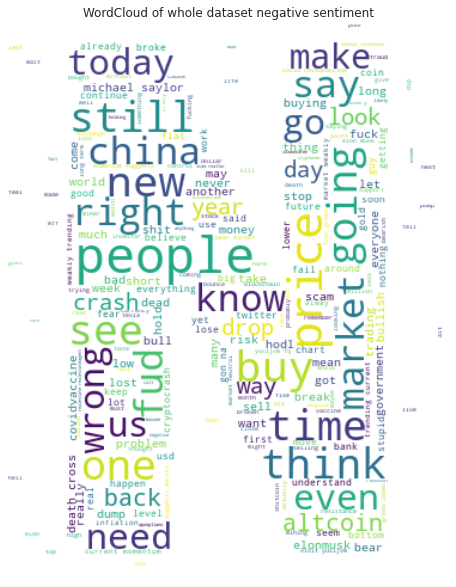

In [ ]:
text_with_nltk(df_neg['text'], 'whole dataset negative sentiment', pos='n')